<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#Prepare-Text-Data" data-toc-modified-id="Prepare-Text-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Prepare Text Data</a></span></li><li><span><a href="#Show-Model-Topics" data-toc-modified-id="Show-Model-Topics-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Show Model Topics</a></span></li><li><span><a href="#Extract-Keywords" data-toc-modified-id="Extract-Keywords-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Extract Keywords</a></span></li><li><span><a href="#Translate-Output" data-toc-modified-id="Translate-Output-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Translate Output</a></span></li><li><span><a href="#Organize-by-Part-of-Speech" data-toc-modified-id="Organize-by-Part-of-Speech-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Organize by Part of Speech</a></span></li><li><span><a href="#Get-TFIDF-Keywords" data-toc-modified-id="Get-TFIDF-Keywords-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Get TFIDF Keywords</a></span></li></ul></li><li><span><a href="#Visualization-Functions" data-toc-modified-id="Visualization-Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualization Functions</a></span><ul class="toc-item"><li><span><a href="#Graph-of-Topic-Number-Evaluations" data-toc-modified-id="Graph-of-Topic-Number-Evaluations-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Graph of Topic Number Evaluations</a></span></li><li><span><a href="#pyLDAvis-Topic-Visualization" data-toc-modified-id="pyLDAvis-Topic-Visualization-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>pyLDAvis Topic Visualization</a></span></li><li><span><a href="#Word-Cloud" data-toc-modified-id="Word-Cloud-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Word Cloud</a></span></li><li><span><a href="#t-SNE" data-toc-modified-id="t-SNE-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>t-SNE</a></span></li></ul></li><li><span><a href="#gen_files" data-toc-modified-id="gen_files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>gen_files</a></span></li></ul></div>

**kw_extraction**

This notebook describes the use of [kwx](https://github.com/andrewtavis/kwx) by deriving the top keywords for tweets from the [Twitter US Airline Sentiment](https://www.kaggle.com/crowdflower/twitter-airline-sentiment) dataset. 

Follow the provided link and download the data, rename it `airline_tweets.csv` to be more descriptive, then put it in a `data` directory in the cwd.

In [1]:
import os
import sys

import numpy as np
import pandas as pd

from kwx.utils import load_data, prepare_data
from kwx.utils import organize_by_pos, translate_output
from kwx.model import extract_kws, gen_files
from kwx.visuals import graph_topic_num_evals, pyLDAvis_topics
from kwx.visuals import gen_word_cloud, t_sne

import matplotlib.pyplot as plt
import seaborn as sns
# Plot settings
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,5)})

pd.set_option("display.max_rows", 16) # maximum df rows
pd.set_option('display.max_columns', None) # maximum df columns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>")) # widens interface
# %matplotlib notebook

# Load Data

In [2]:
df_airline_tweets = load_data(data='data/airline_tweets.csv', target_cols='text')
df_airline_tweets[15:20]

,text
15,@VirginAmerica SFO-PDX schedule is still MIA.
16,@VirginAmerica So excited for my first cross c...
17,@VirginAmerica I flew from NYC to SFO last we...
18,I ❤️ flying @VirginAmerica. ☺️👍
19,@VirginAmerica you know what would be amazingl...


## Prepare Text Data

In [3]:
input_language, output_language = 'english', 'english'

In [4]:
# The [0] gives us the corpus
# [1] is clean strings for BERT
# [2] the indexes of selected entries if sample_size != 1
text_corpus = prepare_data(
    data=df_airline_tweets,
    target_cols='text',
    input_language=input_language, 
    min_freq=2,
    min_word_len=4,
    sample_size=1,
)[0]

In [5]:
text_corpus[15:20]

[['virginamerica', 'schedule'],
 ['virgin_america',
  'cross_country',
  'virginamerica',
  'excited',
  'cross',
  'country',
  'flight',
  'hear',
  'virgin',
  'america'],
 ['virginamerica', 'week', 'seat', 'gentleman'],
 ['virginamerica'],
 ['virginamerica', 'amazingly', 'awesome']]

## Show Model Topics

In [6]:
num_keywords = 15
num_topics = 10

In [8]:
# return_topics=True gives us the topics themselves
topics = extract_kws(
    method='LDA',
    text_corpus=text_corpus,
    clean_texts=None,
    input_language=input_language,
    output_language=None,
    num_keywords=num_keywords,
    num_topics=num_topics,
    corpuses_to_compare=None,
    return_topics=True,
    ignore_words=None,
    min_freq=2,
    min_word_len=4,
    sample_size=1,
    prompt_remove_words=False,
)

In [9]:
topics[0]

['americanair',
 'usairway',
 'hour',
 'hold',
 'delay',
 'flight',
 'wait',
 'time',
 'plane',
 'tell',
 'usairways',
 'hold_hour',
 'minute',
 'phone',
 'call']

## Extract Keywords

In [10]:
# The following is a string or list of strings to not include in outputs
# This variable is updated by the user if prompt_remove_words=True
ignore_words = None

In [11]:
freq_kws = extract_kws(
    method='frequency',
    text_corpus=text_corpus,
    clean_texts=None,
    input_language=input_language,
    output_language=None,
    num_keywords=num_keywords,
    num_topics=num_topics,
    corpuses_to_compare=None,
    return_topics=False,
    ignore_words=None,
    min_freq=2,
    min_word_len=4,
    sample_size=1,
    prompt_remove_words=False
)

In [12]:
freq_kws

['flight',
 'united',
 'americanair',
 'southwestair',
 'jetblue',
 'usairway',
 'hour',
 'cancel',
 'service',
 'delay',
 'customer',
 'time',
 'usairways',
 'plane',
 'hold']

In [13]:
lda_kws = extract_kws(
    method='LDA',
    text_corpus=text_corpus,
    clean_texts=None,
    input_language=input_language,
    output_language=None,
    num_keywords=num_keywords,
    num_topics=num_topics,
    corpuses_to_compare=None,
    return_topics=False,
    ignore_words=None,
    min_freq=2,
    min_word_len=4,
    sample_size=1,
    prompt_remove_words=True
)

The LDA keywords are:

['united', 'virginamerica', 'hold', 'delay', 'southwestair', 'service', 'customer', 'flight', 'gate', 'americanair', 'usairway', 'cancel', 'flightled', 'jetblue', 'late']

Are there words that should be removed [y/n]? y
Type or copy word(s) to be removed: united, virginamerica, southwestair, americanair, usairway, jetblue


The new LDA keywords are:

['flight', 'service', 'plane', 'email', 'usairways', 'cancel', 'flightled', 'hour', 'hold', 'time', 'gate', 'delay', 'wait', 'baggage', 'claim']

Are there words that should be removed [y/n]? n


In [14]:
lda_kws

['flight',
 'service',
 'plane',
 'email',
 'usairways',
 'cancel',
 'flightled',
 'hour',
 'hold',
 'time',
 'gate',
 'delay',
 'wait',
 'baggage',
 'claim']

## Translate Output

In [15]:
# translate_output(
#     outputs=lda_kws, 
#     input_language=input_language, 
#     output_language='spanish'
# )

## Organize by Part of Speech

In [16]:
organize_by_pos(outputs=lda_kws, output_language=output_language)

{'Nouns:': [flight,
  service,
  plane,
  email,
  usairways,
  hour,
  time,
  baggage,
  claim,
  gate,
  delay],
 'Verbs:': [cancel, flightled, hold, wait]}

## Get TFIDF Keywords

In [17]:
df_united = df_airline_tweets[
    df_airline_tweets['text'].str.contains("united")
]

In [18]:
# The [0] gives us the corpus
# [1] is clean strings for BERT
# [2] the indexes of selected entries if sample_size != 1
united_corpus = prepare_data(
    data=df_united,
    target_cols='text',
    input_language=input_language, 
    min_freq=2,
    min_word_len=4,
    sample_size=1,
)[0]

In [19]:
df_other_airlines = df_airline_tweets.loc[
    np.setdiff1d(df_airline_tweets.index, df_united.index)
]

In [20]:
# The [0] gives us the corpus
# [1] is clean strings for BERT
# [2] the indexes of selected entries if sample_size != 1
other_airlines_corpus = prepare_data(
    data=df_other_airlines,
    target_cols='text',
    input_language=input_language, 
    min_freq=2,
    min_word_len=4,
    sample_size=1,
)[0]

In [21]:
# Words that are prevalent in United tweets compared to others
tfidf_kws = extract_kws(
   method='tfidf',
   text_corpus=united_corpus,
   clean_texts=None,
   input_language=input_language,
   output_language=None,
   num_keywords=10,
   num_topics=10,
   corpuses_to_compare=other_airlines_corpus,
   return_topics=False,
   ignore_words=ignore_words,
   min_freq=2,
   min_word_len=4,
   sample_size=1,
   prompt_remove_words=False,
)

In [22]:
tfidf_kws

['united',
 'flight',
 'delay',
 'service',
 'customer',
 'hour',
 'time',
 'plane',
 'cancel',
 'wait']

# Visualization Functions

## Graph of Topic Number Evaluations

In [23]:
topic_nums_to_compare = list(range(5, 16))

In [24]:
# Commented out to avoid long run times
# figure = graph_topic_num_evals(
#     method=['lda', 'bert', 'lda_bert'],
#     text_corpus=text_corpus, 
#     input_language=input_language,
#     num_keywords=num_keywords,
#     topic_nums_to_compare=topic_nums_to_compare,
#     sample_size=1,
#     metrics=True,  # stability and coherence
#     save_file=False, # True for pwd or directory name
#     return_ideal_metrics=False, # don't  output ideal model instead of plot
#     verbose=False,  # so progress bar isn't broken online
# )
# plt.show()

## pyLDAvis Topic Visualization

In [25]:
# Commented out as it changes the output dimensions due to its width
# pyLDAvis_topics(
#     method='lda',
#     text_corpus=text_corpus, 
#     input_language=input_language,
#     num_topics=num_topics,
#     save_file=False, # True for pwd or directory name
#     display_ipython=True,  # <- show in Jupyter notebook
# )

## Word Cloud

In [26]:
ignore_words = [
    "jetblue",
    "united",
    "americanair",
    "usairway",
    "southwestair",
    "virginamerica",
    "fleek",
    "usairways",
    "flightled",
]

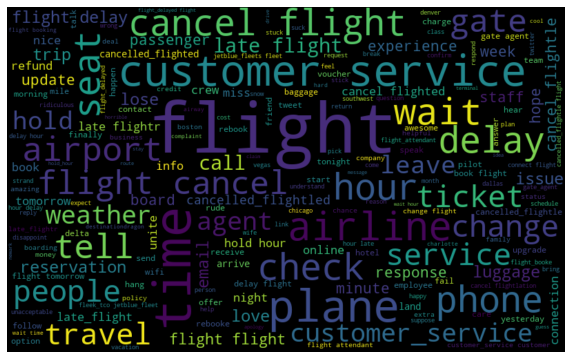

In [27]:
gen_word_cloud(
    text_corpus=text_corpus,
    input_language=input_language,
    ignore_words=ignore_words,
    height=500,
    save_file=False, # True for pwd or directory name
)

## t-SNE

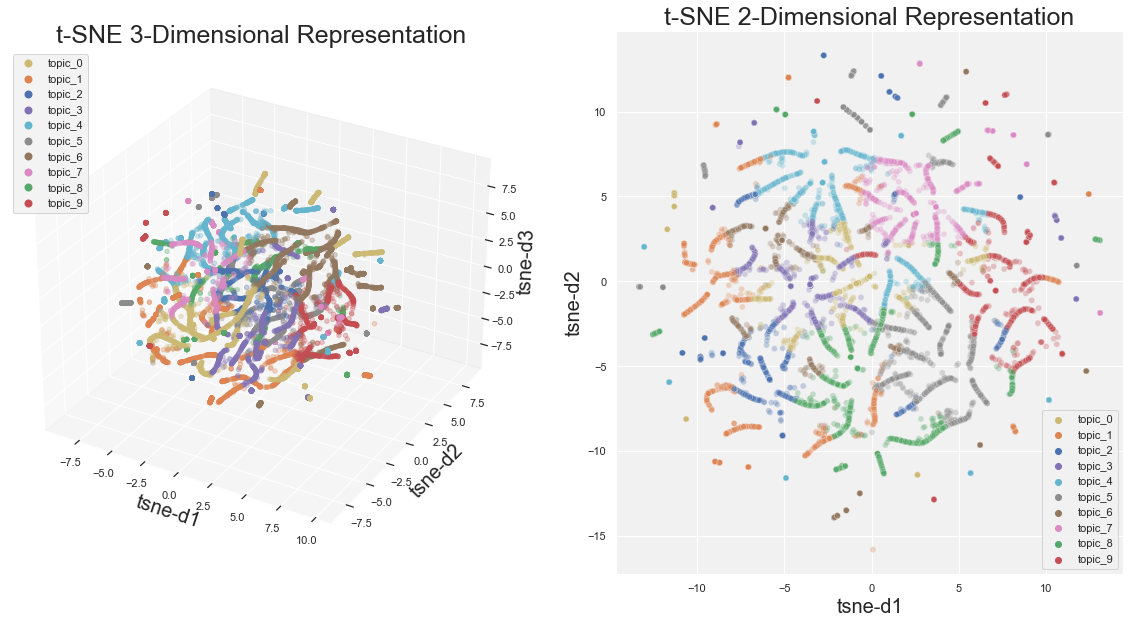

In [28]:
t_sne(
    dimension="both", 
    text_corpus=text_corpus, 
    num_topics=num_topics, 
    remove_3d_outliers=True,
    fig_size=(20, 10),
    save_file=False, # True for pwd or directory name
)

plt.show()

# gen_files

[kwx.model.gen_files](https://github.com/andrewtavis/kwx/blob/main/kwx/model.py) does the following:

- Computes the optimal number of topics for the given model type(s)

- Extracts the most frequent keywords and those for the optimal topic model

- Allows the user to refine keywords given their intuitions

- Plots the desired visuals

- Puts all of the above in a directory or zipped file

In [29]:
# Commented out to avoid long run times
# gen_files(
#     method=['lda', 'bert', 'lda_bert'],
#     text_corpus=text_corpus, 
#     input_language=input_language,
#     output_language=None,
#     num_keywords=num_keywords,
#     topic_nums_to_compare=topic_nums_to_compare,
#     ignore_words=ignore_words,
#     min_freq=2,
#     min_word_len=4,
#     sample_size=1,
#     prompt_remove_words=True,
#     verbose=False,  # so progress bar isn't broken online
#     org_by_pos=False,  # organize keywords by part of speech
#     incl_visuals=['topic_num_evals', 'word_cloud', 'pyLDAvis'],  # t_sne not zipping properly
#     zip_results=True,
# )